In [1]:
import salem, datetime
import numpy as np
import matplotlib.pyplot as plt
from wrf import smooth2d

ncfiledir = "/home/durmaz/wrfout/wrfout_d01_2021-02-14.nc"
fnamedir = "/home/durmaz/Visulazation/wrf_out_process/shapefiles/gadm36_TUR_1.shp"

ds = salem.open_wrf_dataset(ncfiledir).isel(time=13)

In [2]:
timestart = ds.xtime
timestart = np.datetime_as_string(timestart.values)
timestart = datetime.datetime.strptime(str(timestart),'%Y-%m-%dT%H:%M:%S.%f000')
timestart= timestart - datetime.timedelta(hours= timestart.hour)

timeout = ds.xtime
timeout = np.datetime_as_string(timeout.values)
timeout = datetime.datetime.strptime(str(timeout),'%Y-%m-%dT%H:%M:%S.%f000')

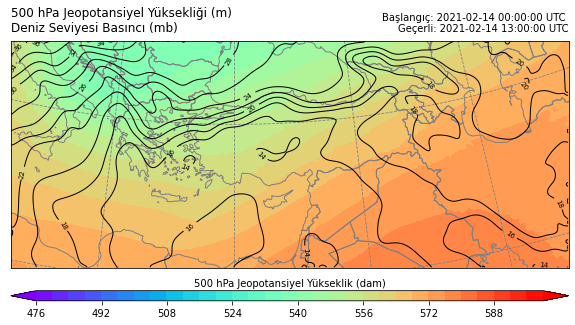

In [6]:
# deniz seviyesi basıncı ve ht500
slp = ds.SLP
ht500 = ds.salem.wrf_plevel('Z', 500)
smooth_slp = smooth2d(slp,100, cenweight=4)

# Bunu subplots ne öğren ?
fig, ax = plt.subplots(figsize=(10,6))


shapetr = salem.read_shapefile(fnamedir)
# plot the salem map background, make countries in grey
smap = ds.salem.get_map(countries=False)
smap.set_shapefile(countries=True, color='grey')
# Add shapefile
# smap.set_shapefile(shapetr,zorder=2)
smap.plot(ax=ax)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


logo=plt.imread("/home/durmaz/Visulazation/wrf_out_process/logo.png")
fig.figimage(logo,380,420,alpha=0.7)

xx, yy = smap.grid.transform(slp.west_east.values, slp.south_north.values,
                             crs=slp.salem.grid.proj)
levels = np.arange(950,6040,40)
contours = ax.contour(xx, yy, smooth_slp,colors="black",linewidths=1,levels=np.arange(950,1100,2))
ax.clabel(contours, inline=1, fontsize=7, fmt=lambda p: f'{str(int(p))[-2:]}')

levels = np.arange(476,604,4)
ht500contour= ax.contourf(xx, yy,ht500/10,extend="both",cmap="rainbow",levels=levels)
cbar= fig.colorbar(ht500contour,fraction=0.071,orientation="horizontal",pad=.07,aspect=50)
cbar.set_label("500 hPa Jeopotansiyel Yükseklik (dam)",labelpad=-40)

plt.title("500 hPa Jeopotansiyel Yüksekliği (m)\nDeniz Seviyesi Basıncı (mb)",loc="left",pad=10,fontsize=12)
plt.title(f'Başlangıç: {timestart} UTC \nGeçerli: {timeout} UTC',loc="right",pad=10,fontsize=10)

fig.savefig('slp_500h_{}.png'.format(timeout),dpi=300,transparent=False)   

In [ ]:
# from metpy.calc import absolute_vorticity
# from metpy.units import units
# u=ds.U
# v=ds.V
# avo= absolute_vorticity(u=u,v=v,dx=ds.DX*units.meter,dy=ds.DY*units.meter)
# avo.attrs=u.attrs
# zcoord = ds.salem._obj['PRESSURE']
# out = avo.salem.interpz(zcoord, [500], dim_name='p')
# out['p'].attrs['description'] = 'pressure'
# out['p'].attrs['units'] = 'hPa'

In [ ]:
import numba
numba.prange(81)

In [ ]:
for abasd in gdf.geometry:
    print(abasd)

In [22]:
from numba import prange
for abasd in prange(0):
    print(abasd)

In [19]:
g=(gdf.geometry)[0]

In [4]:
shpf = salem.get_demo_file('Lev_09_MAIN_BAS_4099000881.shp')
gdf = salem.read_shapefile(shpf)


In [15]:
gdf.geometry

0     POLYGON ((90.32951 30.60953, 90.32689 30.61114...
1     POLYGON ((90.56685 30.80082, 90.56631 30.81076...
2     POLYGON ((90.69027 30.88006, 90.69110 30.88112...
3     POLYGON ((90.65405 30.83727, 90.65342 30.84509...
4     POLYGON ((90.87665 30.69529, 90.87814 30.69523...
5     POLYGON ((90.87588 30.75428, 90.88549 30.75478...
6     POLYGON ((90.97623 30.79277, 90.97963 30.78838...
7     POLYGON ((91.27917 30.88333, 91.28138 30.88390...
8     POLYGON ((90.71301 30.89159, 90.71307 30.89682...
9     POLYGON ((90.69866 30.88258, 90.69619 30.88508...
10    POLYGON ((90.53278 30.81083, 90.52721 30.81610...
11    POLYGON ((90.40325 30.86497, 90.40067 30.86872...
12    POLYGON ((90.61633 30.57182, 90.61610 30.56862...
13    POLYGON ((90.65449 30.58651, 90.65452 30.58508...
14    POLYGON ((90.80833 30.53750, 90.80762 30.52607...
15    POLYGON ((90.45065 30.53961, 90.44934 30.52704...
16    POLYGON ((90.27917 30.67500, 90.27566 30.67590...
17    POLYGON ((90.08333 30.55417, 90.07674 30.5